In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datagen import *
from fairopt import FairOptimization

In [2]:
s, a, y, r_star, r = dat_gen_loan_univariate_reward(
    6000, intcp_y=-1, beta_y_a=2, beta_y_s=1, 
    intcp_r=-1, beta_r_a=2.5, beta_r_s=0, lmbd_a=0.5
)
s_train, s_test = s[:5000], s[5000:]
a_train, a_test = a[:5000], a[5000:]
y_train, y_test = y[:5000], y[5000:]
r_star_train, r_star_test = r_star[:5000], r_star[5000:]
r_train, r_test = r[:5000], r[5000:]

In [3]:
fairopt = FairOptimization(s_train, a_train, y_train, r_train)

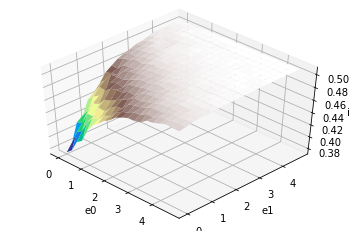

In [4]:
e0 = np.arange(0, 5, 0.25)
e1 = np.arange(0, 5, 0.25)
e0g, e1g = np.meshgrid(e0, e1)
ipwe = np.empty_like(e0g)
for i in range(len(e0)):
    for j in range(len(e1)):
        ipwe[i, j] = fairopt.ipwe([e0[i], e1[j]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(e0g, e1g, ipwe, cmap='terrain')
ax.set_xlabel('e0')
ax.set_ylabel('e1')
ax.set_zlabel('ipwe')
plt.show()


In [5]:
eta_opt = fairopt.optimize(fairopt.ipwe, method='shgo', bounds=[(0, 5), (0, 5)]).x

In [13]:
cf = fairopt.cf_metric(s_test, a_test, eta_opt)
mae = fairopt.mae(s_test, a_test, y_test, eta_opt)
reward = fairopt.reward_simulation(s_test, a_test, r_star_test, eta_opt)
pd.set_option('precision', 7)
pd.DataFrame(np.stack([cf, mae, reward])).rename(
    index={0:'CF', 1:'MAE', 2:'E(R)'},
    columns={0:'ML', 1:'FTU', 2:'AA', 3:'FLAP-1', 4:'FLAP-2', 5:'FLAP-eta'}
)

,ML,FTU,AA,FLAP-1,FLAP-2,FLAP-eta
CF,0.3289326,0.2338128,0.0034864,0.0000076,0.0000087,0.0000002
MAE,0.3197006,0.3303314,0.3594313,0.3654336,0.3654394,0.2500734
E(R),0.3717984,0.3689270,0.3500282,0.3441963,0.3441875,0.4439413


In [18]:
fairopt.optimize(fairopt.aipwe, method='shgo', bounds=[(0, 5), (0, 5)])

     fun: -0.49923281403237446
    funl: array([-0.49923281])
 message: 'Optimization terminated successfully.'
    nfev: 9
     nit: 2
   nlfev: 4
   nlhev: 0
   nljev: 1
 success: True
       x: array([5., 5.])
      xl: array([[5., 5.]])

In [14]:
s, a, y, r_star, r = dat_gen_loan_multivariate_reward(
    6000, beta_y_e=1, beta_y_i=2, beta_y_s=[-1.5, -2.5, -1.5],
    beta_r_e=2, beta_r_i=1, beta_r_s=[-2, -2, -2],
)
s_train, s_test = s[:5000], s[5000:]
a_train, a_test = a[:5000], a[5000:]
y_train, y_test = y[:5000], y[5000:]
r_star_train, r_star_test = r_star[:5000], r_star[5000:]
r_train, r_test = r[:5000], r[5000:]

In [15]:
fairopt = FairOptimization(s_train, a_train, y_train, r_train)
fairopt.ftup.params

array([-1.5303178 ,  1.46165408,  0.95101328])

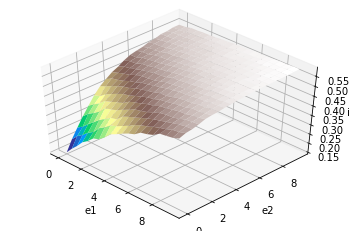

In [6]:
e0 = fairopt.ftup.params[0]
e1 = np.arange(0, 10, 0.5)
e2 = np.arange(0, 10, 0.5)
e1g, e2g = np.meshgrid(e1, e2)
ipwe = np.empty_like(e1g)
for i in range(len(e1)):
    for j in range(len(e2)):
        ipwe[i, j] = fairopt.ipwe([e0, e1[i], e2[j]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(e1g, e2g, ipwe, cmap='terrain')
ax.set_xlabel('e1')
ax.set_ylabel('e2')
ax.set_zlabel('ipwe')
plt.show()

In [16]:
eta_opt = fairopt.optimize(fairopt.ipwe, method='shgo', bounds=[(0, 10), (0, 10), (0, 10)]).x

In [18]:
cf = fairopt.cf_metric(s_test, a_test, eta_opt)
mae = fairopt.mae(s_test, a_test, y_test, eta_opt)
reward = fairopt.reward_simulation(s_test, a_test, r_star_test, eta_opt)
pd.set_option('precision', 8)
pd.DataFrame(np.stack([cf, mae, reward])).rename(
    index={0:'CF', 1:'MAE', 2:'E(R)'},
    columns={0:'ML', 1:'FTU', 2:'AA', 3:'FLAP-1', 4:'FLAP-2', 5:'FLAP-eta'}
)

,ML,FTU,AA,FLAP-1,FLAP-2,FLAP-eta
CF,0.43334196,0.29870926,0.01438308,0.00025884,0.00025270,0.00000004
MAE,0.37735926,0.38936626,0.40421158,0.40606533,0.40607768,0.36199997
E(R),0.34071359,0.32595785,0.31250910,0.31106510,0.31100831,0.40000009
